# 函数式参数
Python语言的一个核心概念是[函数式编程](https://en.wikipedia.org/wiki/Functional_programming)：我们定义函数并将其应用于我们的数据。

In [1]:
import numpy as np 

values = np.asarray([1, 2, 3, 4, 10])

In [2]:
def double_number(x):
    return x * 2

In [3]:
double_number(values)

array([ 2,  4,  6,  8, 20])

在Python中，你也可以有包含函数的变量，并且可以执行它们：

In [4]:
my_function = double_number

my_function(values)

array([ 2,  4,  6,  8, 20])

## 自定义函数式参数
你还可以定义自己的接受函数式参数的自定义函数。例如，我们可以定义一个`count_blobs`函数，它接受一个`image`和一个`threshold_algorithm`函数作为参数。

In [5]:
import matplotlib.pyplot as plt
from skimage.measure import label

def count_blobs(image, threshold_algorithm):
    # binarize the image using a given 
    # threshold-algorithm
    threshold = threshold_algorithm(image)
    binary = image > threshold
    
    # show intermediate result
    # plt.imshow(binary)
    
    # return count blobs
    labels = label(binary)
    return labels.max()

现在我们打开一张图像并对其进行两次分析。

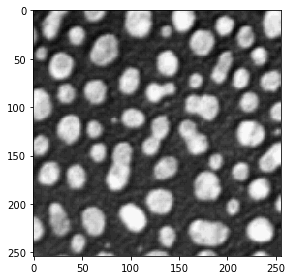

In [6]:
from skimage.io import imread, imshow

blobs_image = imread('../../data/blobs.tif')

imshow(blobs_image)

现在我们用两种不同的算法作为参数来计算这张图像中的斑点数量：

In [7]:
from skimage.filters import threshold_otsu

count_blobs(blobs_image, threshold_otsu)

64

In [8]:
from skimage.filters import threshold_yen

count_blobs(blobs_image, threshold_yen)

67

## 练习
假设你想找出哪种阈值算法最适合你的图像。因此，你可能想看看图像被多个算法阈值化的效果。定义一个阈值算法列表，例如从[这个列表](https://scikit-image.org/docs/dev/search.html?q=threshold_&check_keywords=yes&area=default)中选择。编写一个for循环，将这些阈值算法应用于斑点图像并显示结果。结果应该类似于[这个例子](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html)。